In [20]:
#Importing Libraries
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [21]:
df_GM = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Analyst')]

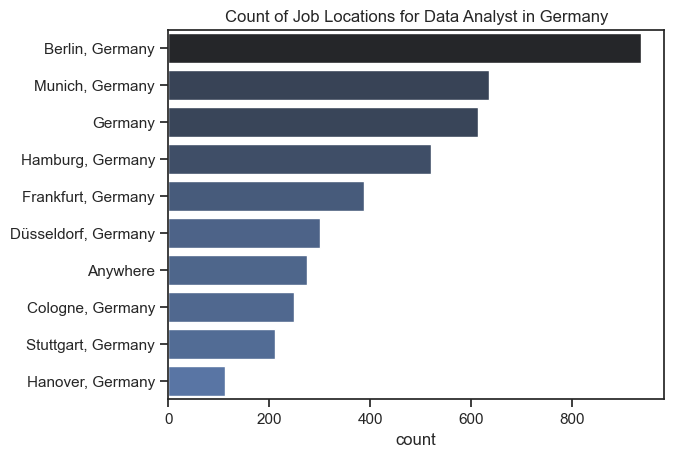

In [22]:
df_plot = df_GM['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.title('Count of Job Locations for Data Analyst in Germany')
plt.ylabel('')
plt.show()

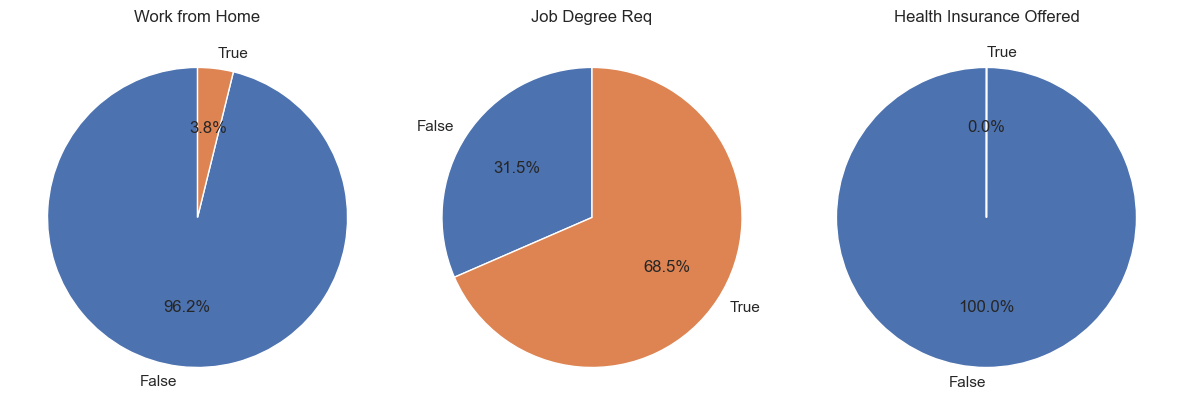

In [24]:


# Columns to plot and their titles
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

# Setup figure and axes
fig, ax = plt.subplots(1, 3, figsize=(12, 5))  # More concise

# Loop through columns and plot
for i, (column, title) in enumerate(dict_column.items()):
    counts = df_GM[column].value_counts().reindex([False, True], fill_value=0)  # Ensures consistent label order
    ax[i].pie(counts, startangle=90, autopct='%.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


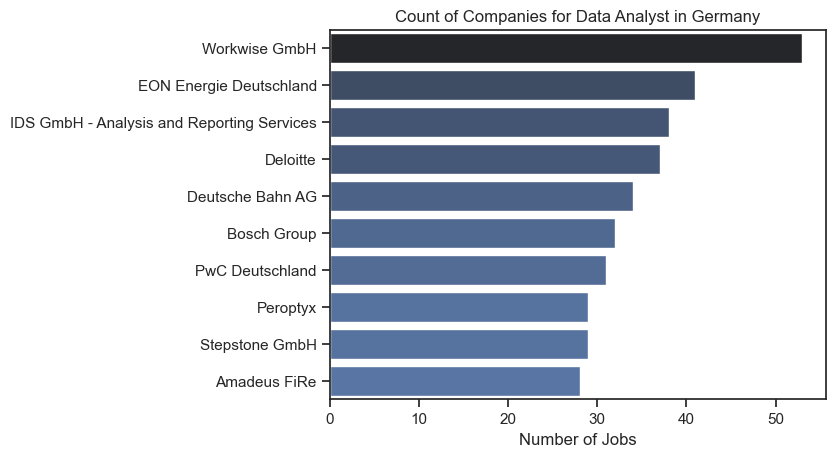

In [33]:
df_plot = df_GM['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.title('Count of Companies for Data Analyst in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()